<a href="https://colab.research.google.com/github/HONAJIPHAD/Topic-Modeling-On-News-Article/blob/main/Topic_Modeling_On_News_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title : Extraction/identification of major topics & themes discussed in news articles.


##Problem Description

In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

##Data Description

The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [12]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Capston Projects/New folder/bbc.csv')

#First Look of Data

In [15]:
data.head()

,Unnamed: 0,news,type
0,0,Disney settles disclosure charges\n \n Walt Di...,business
1,1,Asia shares defy post-quake gloom\n \n Thailan...,business
2,2,India-Pakistan peace boosts trade\n \n Calmer ...,business
3,3,Quake's economic costs emerging\n \n Asian gov...,business
4,4,Ailing EuroDisney vows turnaround\n \n EuroDis...,business


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [17]:
data.shape

(2225, 3)

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data.type)

In [ ]:
data['News_length'] = data['news'].str.len()
print(data['News_length'])

In [ ]:
data.head()

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(data['News_length']).set_title('News length distribution');

#Funtion to remove punctuation

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [18]:
data['news'] = data['news'].apply(remove_punctuation)
data.head(10)

,Unnamed: 0,news,type
0,0,Disney settles disclosure charges\n \n Walt Di...,business
1,1,Asia shares defy postquake gloom\n \n Thailand...,business
2,2,IndiaPakistan peace boosts trade\n \n Calmer r...,business
3,3,Quakes economic costs emerging\n \n Asian gove...,business
4,4,Ailing EuroDisney vows turnaround\n \n EuroDis...,business
5,5,Fresh hope after Argentine crisis\n \n Three y...,business
6,6,US to probe airline travel chaos\n \n The US g...,business
7,7,Green reports shun supply chain\n \n Nearly 20...,business
8,8,Durex maker SSL awaits firm bid\n \n UK condom...,business
9,9,Fosters buys stake in winemaker\n \n Australia...,business


#Removeing Stop Words From Data

In [19]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
sw = stopwords[:]

In [21]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [22]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [23]:
data['news'] = data['news'].apply(stopwords)
data.head(10)

,Unnamed: 0,news,type
0,0,disney settles disclosure charges walt disney ...,business
1,1,asia shares defy postquake gloom thailand beco...,business
2,2,indiapakistan peace boosts trade calmer relati...,business
3,3,quakes economic costs emerging asian governmen...,business
4,4,ailing eurodisney vows turnaround eurodisney e...,business
5,5,fresh hope argentine crisis three years argent...,business
6,6,us probe airline travel chaos us government in...,business
7,7,green reports shun supply chain nearly 20 uk t...,business
8,8,durex maker ssl awaits firm bid uk condom make...,business
9,9,fosters buys stake winemaker australian brewer...,business


#Collect vocabulary count

In [24]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['news'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [25]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

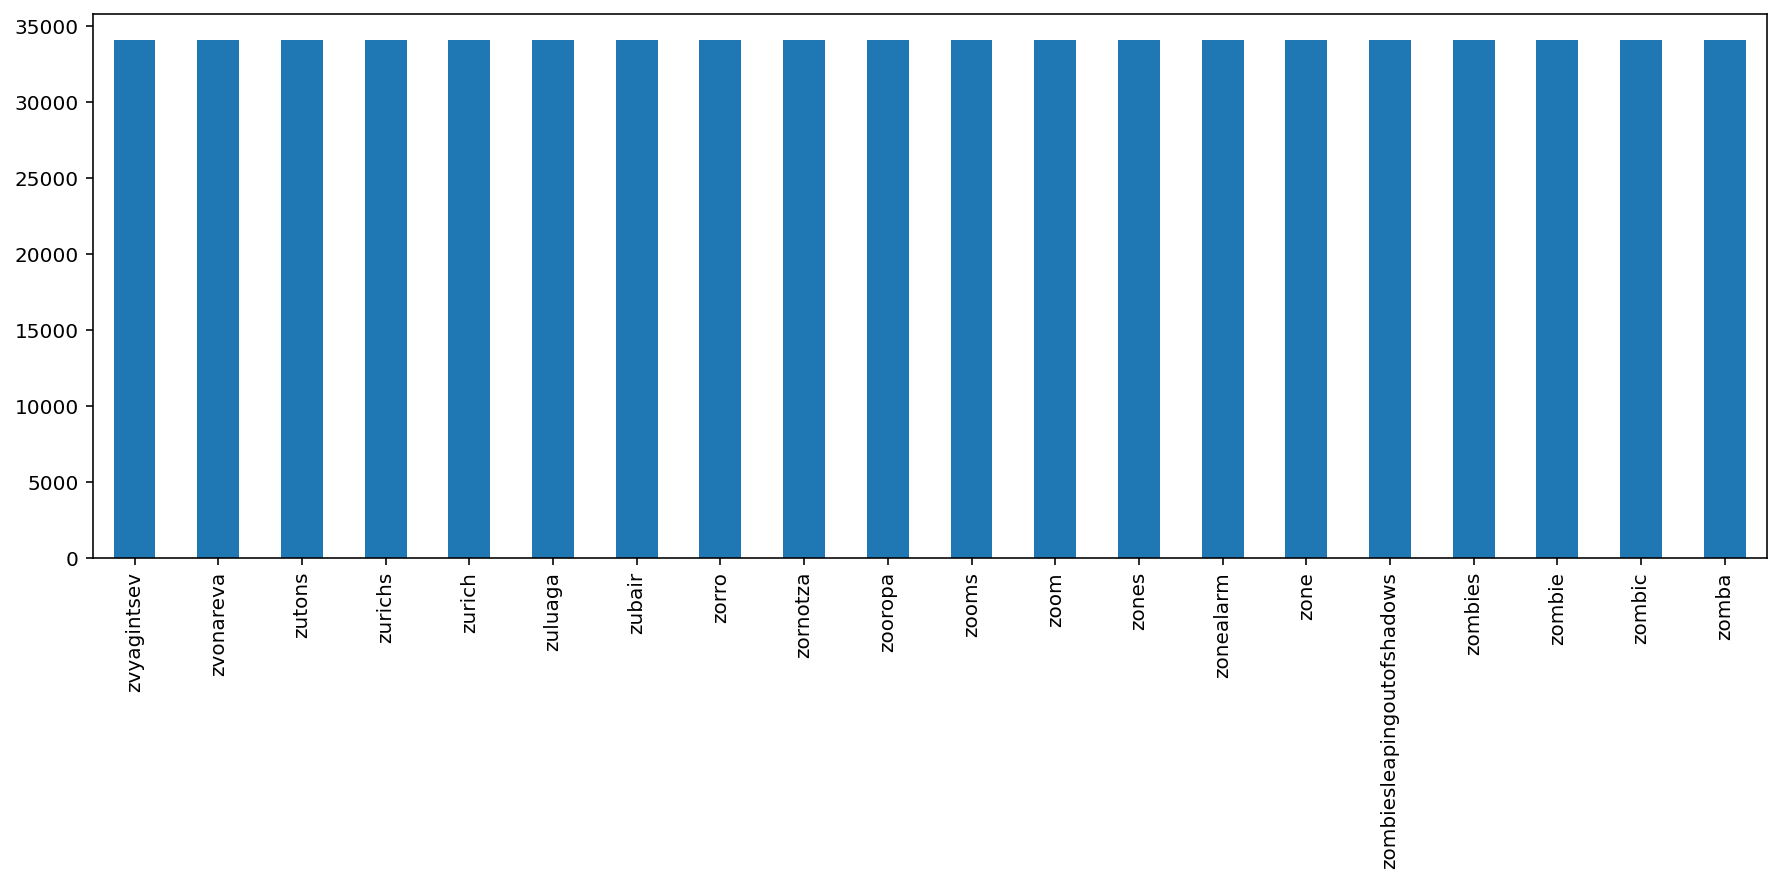

In [26]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

#Stemming

In [27]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [28]:
data['news'] = data['news'].apply(stemming)
data.head(10)

,Unnamed: 0,news,type
0,0,disney settl disclosur charg walt disney settl...,business
1,1,asia share defi postquak gloom thailand becom ...,business
2,2,indiapakistan peac boost trade calmer relat in...,business
3,3,quak econom cost emerg asian govern intern age...,business
4,4,ail eurodisney vow turnaround eurodisney europ...,business
5,5,fresh hope argentin crisi three year argentina...,business
6,6,us probe airlin travel chao us govern investig...,business
7,7,green report shun suppli chain near 20 uk top ...,business
8,8,durex maker ssl await firm bid uk condom maker...,business
9,9,foster buy stake winemak australian brewer fos...,business


In [29]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit the vectorizer using the text data
tfid_vectorizer.fit(data['news'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

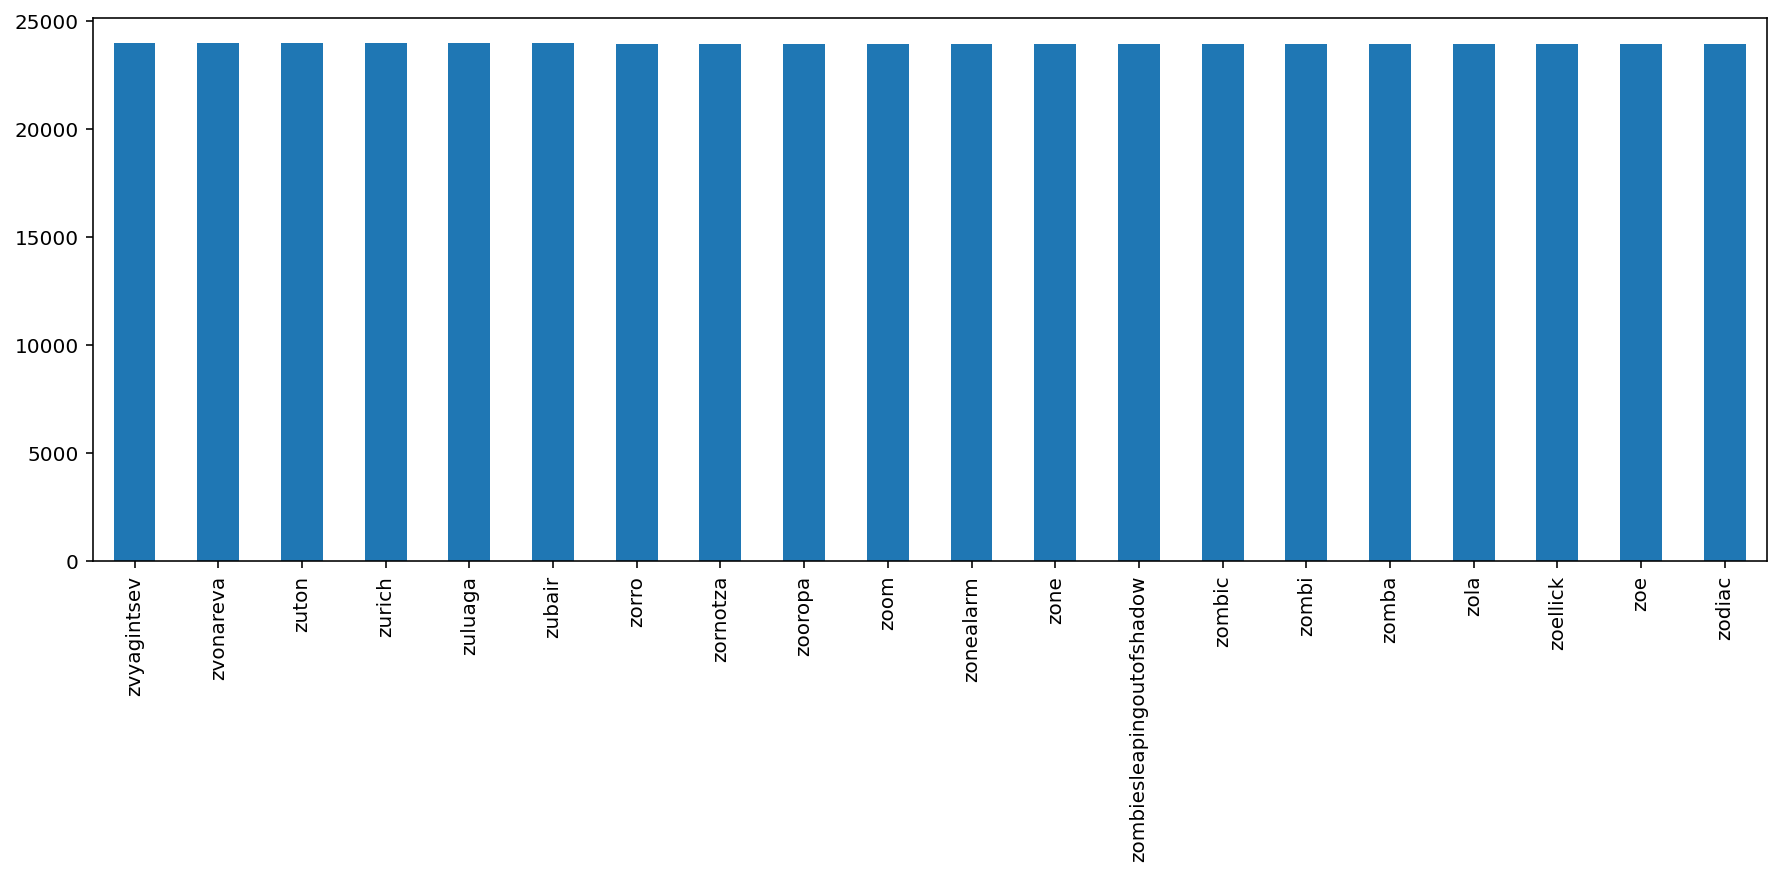

In [30]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'bar', figsize=(15,5))

In [31]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [32]:
data['length'] = data['news'].apply(length)
data.head(10)

,Unnamed: 0,news,type,length
0,0,disney settl disclosur charg walt disney settl...,business,1125
1,1,asia share defi postquak gloom thailand becom ...,business,2136
2,2,indiapakistan peac boost trade calmer relat in...,business,1007
3,3,quak econom cost emerg asian govern intern age...,business,1697
4,4,ail eurodisney vow turnaround eurodisney europ...,business,801
5,5,fresh hope argentin crisi three year argentina...,business,3018
6,6,us probe airlin travel chao us govern investig...,business,2003
7,7,green report shun suppli chain near 20 uk top ...,business,1341
8,8,durex maker ssl await firm bid uk condom maker...,business,889
9,9,foster buy stake winemak australian brewer fos...,business,1734


In [33]:
Business_data = data[data['type'] == 'business']
Entertainment_data = data[data['type'] == 'entertainment']
Politics_data = data[data['type'] == 'politics']
Sport_data = data[data['type'] == 'sport']
Tech_data = data[data['type'] == 'tech']

In [34]:
Business_data

,Unnamed: 0,news,type,length
0,0,disney settl disclosur charg walt disney settl...,business,1125
1,1,asia share defi postquak gloom thailand becom ...,business,2136
2,2,indiapakistan peac boost trade calmer relat in...,business,1007
3,3,quak econom cost emerg asian govern intern age...,business,1697
4,4,ail eurodisney vow turnaround eurodisney europ...,business,801
...,...,...,...,...
505,505,japanes bank battl end japan sumitomo mitsui f...,business,1102
506,506,china keep tight rein credit china effort stop...,business,857
507,507,rover deal may cost 2000 job 2000 job mg rover...,business,1120
508,508,mix reaction man utd offer share manchest unit...,business,1649


#Count of words in Business data